## Demo 2: Analysis by Genotype

We'll run the same processing pipeline as before, but on a new dataset containing sessions from both **Wildtype** and **TH-Cre** mice. The goal is to show that once the pipeline is established, we can treat it as "boilerplate" and move quickly to analyzing differences between experimental groups.

In [1]:
import sys
sys.path.append('../../../')

In [2]:
import warnings
import pytest
from pathlib import Path
from collections import defaultdict

from fiberphotometry.config import PLOTTING_CONFIG
from fiberphotometry.data.data_loading import DataContainer, load_all_sessions
from fiberphotometry.data.session_loading import populate_containers
from fiberphotometry.data.syncer import sync_session
from fiberphotometry.data.timepoint_processing import create_event_idxs_container_for_sessions
from fiberphotometry.processing.plotting_setup import PlottingSetup
from fiberphotometry.processing.signal_info_setup import assign_sessions_signal_info

In [3]:
baseline_path = Path("/Users/fsp585/Desktop/GetherLabCode/FiberphotometryCode/src/trial_Gq-DREADD_CPT")

### Step 1: Running the Boilerplate Pipeline

Now that we understand each function from the previous demo, we can run our entire data preparation pipeline in a single block. This includes loading, populating, syncing, indexing events, and calculating dF/F for all sessions.

In [4]:
sessions = load_all_sessions(
            baseline_dir=str(baseline_path),
            session_type="cpt",
            first_n_dirs=10,
            remove_bad_signal_sessions=True
        );

Processing trial directories:  10%|█         | 1/10 [00:00<00:05,  1.59it/s]/Users/fsp585/Desktop/GetherLabCode/FiberphotometryCode/fiberphotometry/notebooks/demos/../../../fiberphotometry/data/data_loading.py:194: UserWarning: Drug info 'CNO 2.0' has only two tokens; assuming metric is 'mg/kg'.
  warnings.warn(
/Users/fsp585/Desktop/GetherLabCode/FiberphotometryCode/fiberphotometry/notebooks/demos/../../../fiberphotometry/data/data_loading.py:194: UserWarning: Drug info 'CNO 0.1' has only two tokens; assuming metric is 'mg/kg'.
  warnings.warn(
/Users/fsp585/Desktop/GetherLabCode/FiberphotometryCode/fiberphotometry/notebooks/demos/../../../fiberphotometry/data/data_loading.py:194: UserWarning: Drug info 'CNO 0.5' has only two tokens; assuming metric is 'mg/kg'.
  warnings.warn(
/Users/fsp585/Desktop/GetherLabCode/FiberphotometryCode/fiberphotometry/notebooks/demos/../../../fiberphotometry/data/data_loading.py:194: UserWarning: Drug info 'CNO 2.0' has only two tokens; assuming metric i

In [5]:
for s in sessions:
    print(s.trial_dir, s.mouse_id)

/Users/fsp585/Desktop/GetherLabCode/FiberphotometryCode/src/trial_Gq-DREADD_CPT/T1_125.127.129.131_210723veh1 125
/Users/fsp585/Desktop/GetherLabCode/FiberphotometryCode/src/trial_Gq-DREADD_CPT/T1_125.127.129.131_210723veh1 127
/Users/fsp585/Desktop/GetherLabCode/FiberphotometryCode/src/trial_Gq-DREADD_CPT/T1_125.127.129.131_210723veh1 129
/Users/fsp585/Desktop/GetherLabCode/FiberphotometryCode/src/trial_Gq-DREADD_CPT/T1_125.127.129.131_210723veh1 131
/Users/fsp585/Desktop/GetherLabCode/FiberphotometryCode/src/trial_Gq-DREADD_CPT/T2_e.135.137.79_210723veh1 135
/Users/fsp585/Desktop/GetherLabCode/FiberphotometryCode/src/trial_Gq-DREADD_CPT/T2_e.135.137.79_210723veh1 137
/Users/fsp585/Desktop/GetherLabCode/FiberphotometryCode/src/trial_Gq-DREADD_CPT/T2_e.135.137.79_210723veh1 79
/Users/fsp585/Desktop/GetherLabCode/FiberphotometryCode/src/trial_Gq-DREADD_CPT/T3_143.145.147.85_210723veh1 143
/Users/fsp585/Desktop/GetherLabCode/FiberphotometryCode/src/trial_Gq-DREADD_CPT/T3_143.145.147.85_2

In [6]:
populate_containers(sessions)

In [7]:
for session in sessions:
    sync_session(session)

In [8]:
actions_attr_dict = {"Hit": "hit",
                    "Mistake": "mistake", 
                    "Missed Hit": "miss",                    
                    "Correction Trial Correct Rejection": "cor_reject", 
                    "Correct Rejection": "cor_reject"}

reward_attr_dict = {"Reward Collected Start ITI": "reward_collect"}

In [9]:
create_event_idxs_container_for_sessions(sessions, actions_attr_dict, reward_attr_dict)

In [10]:
PlottingSetup(**PLOTTING_CONFIG['cpt']).apply_plotting_setup_to_sessions(sessions)

In [11]:
assign_sessions_signal_info(sessions)

Something different that we notice with these sessions is that they have a genotype attribute attached. This is simply because this is contained as a column in the trial guides.

In [28]:
for s in sessions:
    print(f'mouse id: {s.mouse_id}, genotype: {s.genotype}')

mouse id: 125, genotype: Wildtype
mouse id: 127, genotype: Wildtype
mouse id: 129, genotype: TH-Cre
mouse id: 131, genotype: Wildtype
mouse id: 135, genotype: Wildtype
mouse id: 137, genotype: Wildtype
mouse id: 79, genotype: Wildtype
mouse id: 143, genotype: TH-Cre
mouse id: 145, genotype: Wildtype
mouse id: 147, genotype: Wildtype
mouse id: 85, genotype: Wildtype
mouse id: 157, genotype: TH-Cre
mouse id: 159, genotype: TH-Cre
mouse id: 171, genotype: TH-Cre
mouse id: 173, genotype: TH-Cre
mouse id: 69, genotype: TH-Cre
mouse id: 77, genotype: TH-Cre
mouse id: 125, genotype: Wildtype
mouse id: 127, genotype: Wildtype
mouse id: 129, genotype: TH-Cre
mouse id: 131, genotype: Wildtype
mouse id: 135, genotype: Wildtype
mouse id: 137, genotype: Wildtype
mouse id: 79, genotype: Wildtype
mouse id: 143, genotype: TH-Cre
mouse id: 145, genotype: Wildtype
mouse id: 147, genotype: Wildtype
mouse id: 85, genotype: Wildtype
mouse id: 157, genotype: TH-Cre
mouse id: 159, genotype: TH-Cre
mouse id: 

Notice that some mouse ids repeat, this is because we have multiple sessions for identical mouse ids. Though the mouse id <-> genotype correspondance is always the same (at least it should be).

In [4]:
import pickle
dst = '/Users/fsp585/Desktop/GetherLabCode/FiberphotometryCode/fiberphotometry/notebooks/demos/sessions_example.pkl'

# with open(dst, "wb") as f:
#         pickle.dump(sessions, f)
#         print(f"Pickle file saved at {dst}.")

In [ ]:
with open(dst, 'rb') as f:
    sessions = pickle.load(f)

In [6]:
import matplotlib.pyplot as plt

### Step 2: A First Look at the Data

Before comparing genotypes, it's good practice to visualize the data from a single session to get a feel for the signal quality and response shape.

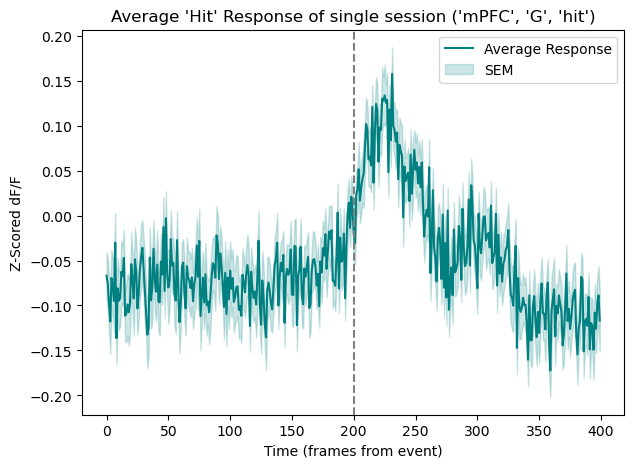

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Get data from the first session ---
first_session = sessions[0]
event_key = ('mPFC', 'G', 'hit')

# Safely access the signal matrix
hit_data = first_session.signal_info.get(event_key)
signal_matrix = hit_data['signal_matrix']

# --- 2. Calculate the average and SEM ---
avg_trace = np.mean(signal_matrix, axis=0)
sem_trace = np.std(signal_matrix, axis=0) / np.sqrt(signal_matrix.shape[0])

# --- 3. Plot the result ---
plt.figure(figsize=(7, 5))

plt.plot(avg_trace, color='teal', label='Average Response')
plt.fill_between(range(len(avg_trace)), avg_trace - sem_trace, avg_trace + sem_trace,
                 color='teal', alpha=0.2, label='SEM')

plt.axvline(x=200, color='gray', linestyle='--') # Mark event time (assuming 400 frames total)
plt.title("Average 'Hit' Response of single session ('mPFC', 'G', 'hit')")
plt.xlabel("Time (frames from event)")
plt.ylabel("Z-Scored dF/F")
plt.legend()
plt.show()

### Step 3: Comparing Groups by Genotype

With our data fully processed, we can now easily group our sessions by the `genotype` attribute and plot the average 'hit' response for each group. This demonstrates how the pipeline makes downstream analysis straightforward.

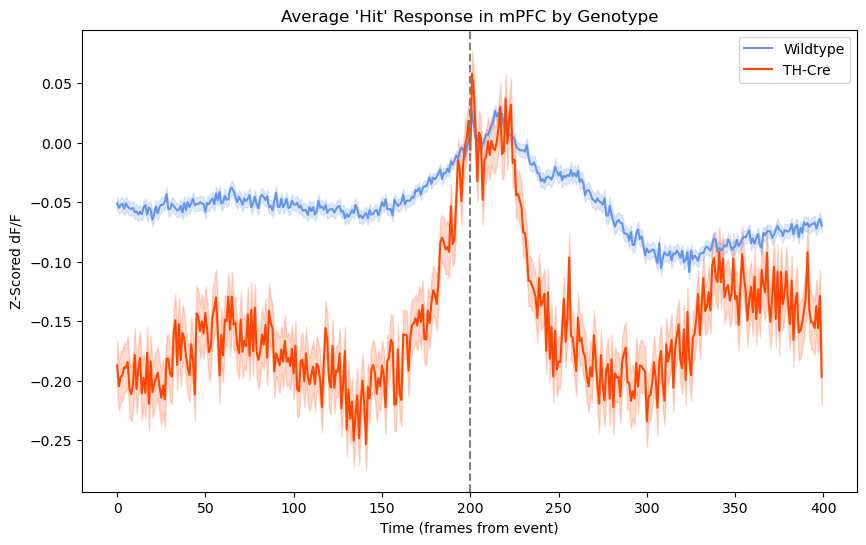

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Collect all "hit" trials for each genotype ---
wt_hits = []
th_cre_hits = []
event_key = ('mPFC', 'G', 'hit')

for session in sessions:
    # Use .get() to safely retrieve the data; skip if the key doesn't exist
    info = session.signal_info.get(event_key)
    if not info:
        continue
    
    signal_matrix = info['signal_matrix']
    if session.genotype == 'Wildtype':
        wt_hits.append(signal_matrix)
    elif session.genotype == 'TH-Cre':
        th_cre_hits.append(signal_matrix)

# --- 2. Calculate average and SEM for each group ---
all_wt_hits = np.vstack(wt_hits)
avg_wt = np.mean(all_wt_hits, axis=0)
sem_wt = np.std(all_wt_hits, axis=0) / np.sqrt(all_wt_hits.shape[0])

all_th_cre_hits = np.vstack(th_cre_hits)
avg_th_cre = np.mean(all_th_cre_hits, axis=0)
sem_th_cre = np.std(all_th_cre_hits, axis=0) / np.sqrt(all_th_cre_hits.shape[0])

# --- 3. Plot the results ---
plt.figure(figsize=(10, 6))

# Plot the Wildtype average and its confidence interval
plt.plot(avg_wt, label='Wildtype', color='cornflowerblue')
plt.fill_between(range(len(avg_wt)), avg_wt - sem_wt, avg_wt + sem_wt,
                 color='cornflowerblue', alpha=0.2)

# Plot the TH-Cre average and its confidence interval
plt.plot(avg_th_cre, label='TH-Cre', color='orangered')
plt.fill_between(range(len(avg_th_cre)), avg_th_cre - sem_th_cre, avg_th_cre + sem_th_cre,
                 color='orangered', alpha=0.2)

# Add plot details
plt.axvline(x=200, color='gray', linestyle='--') # Mark event time (assuming 400 frames total)
plt.title("Average 'Hit' Response in mPFC by Genotype")
plt.xlabel("Time (frames from event)")
plt.ylabel("Z-Scored dF/F")
plt.legend()
plt.show()

### Step 4: Granular Comparison (Genotype vs. Dose)

Aggregating all trials for a single genotype can sometimes hide dose-specific effects. Since our `Session` objects also contain drug dose information, we can easily create a more granular comparison.

The following cell demonstrates this by looping through each dose condition. For each dose, it will generate a separate, individual plot that directly compares the 'hit' response between the Wildtype and TH-Cre mice.

In [36]:
for s in sessions:
    print(s.drug_infos[0], s.genotype)

{'name': 'Vehicle', 'dose': None, 'metric': None} Wildtype
{'name': 'Vehicle', 'dose': None, 'metric': None} Wildtype
{'name': 'Vehicle', 'dose': None, 'metric': None} TH-Cre
{'name': 'Vehicle', 'dose': None, 'metric': None} Wildtype
{'name': 'Vehicle', 'dose': None, 'metric': None} Wildtype
{'name': 'Vehicle', 'dose': None, 'metric': None} Wildtype
{'name': 'Vehicle', 'dose': None, 'metric': None} Wildtype
{'name': 'Vehicle', 'dose': None, 'metric': None} TH-Cre
{'name': 'Vehicle', 'dose': None, 'metric': None} Wildtype
{'name': 'Vehicle', 'dose': None, 'metric': None} Wildtype
{'name': 'Vehicle', 'dose': None, 'metric': None} Wildtype
{'name': 'Vehicle', 'dose': None, 'metric': None} TH-Cre
{'name': 'Vehicle', 'dose': None, 'metric': None} TH-Cre
{'name': 'Vehicle', 'dose': None, 'metric': None} TH-Cre
{'name': 'Vehicle', 'dose': None, 'metric': None} TH-Cre
{'name': 'Vehicle', 'dose': None, 'metric': None} TH-Cre
{'name': 'Vehicle', 'dose': None, 'metric': None} TH-Cre
{'name': 'CNO

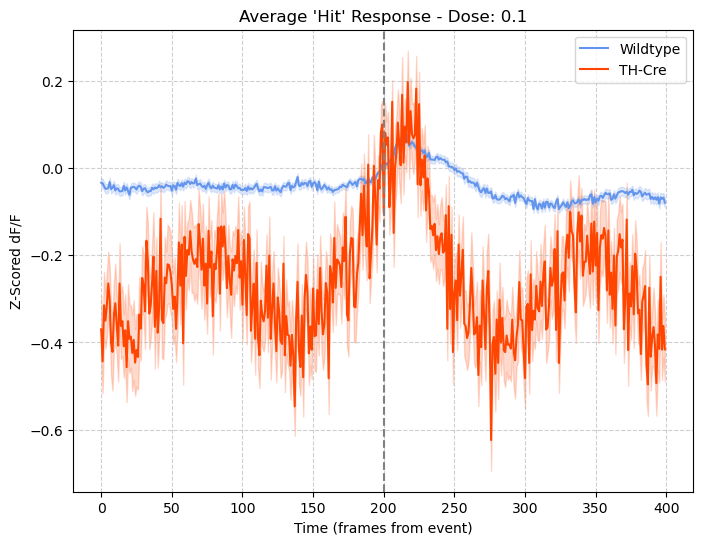

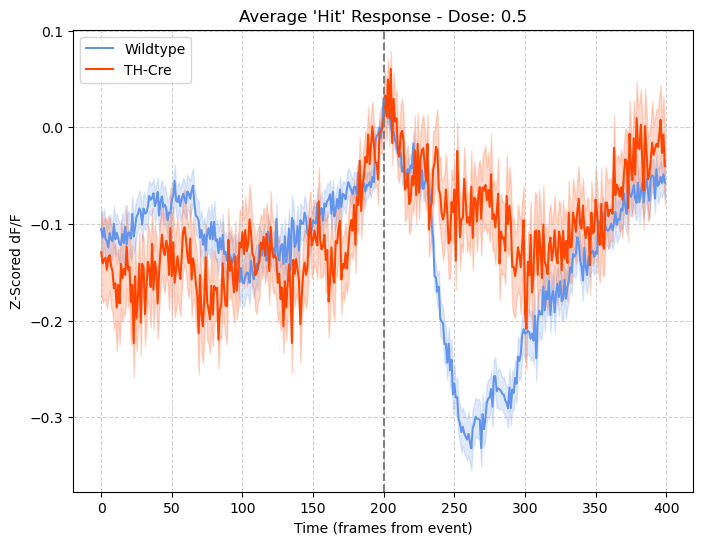

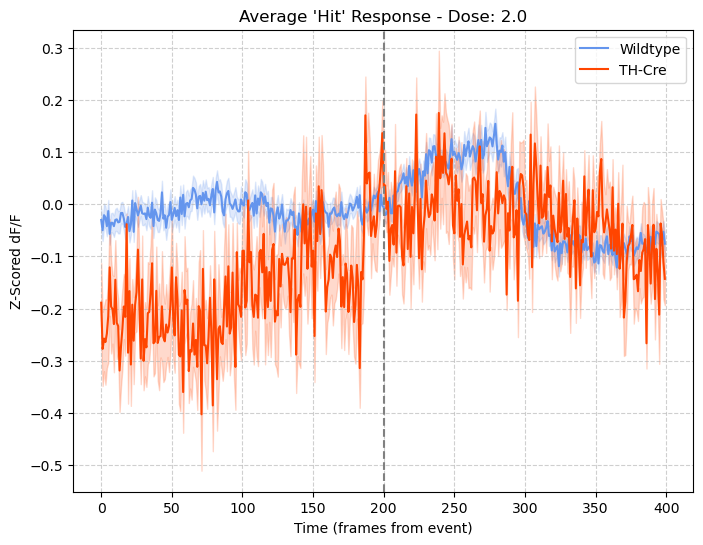

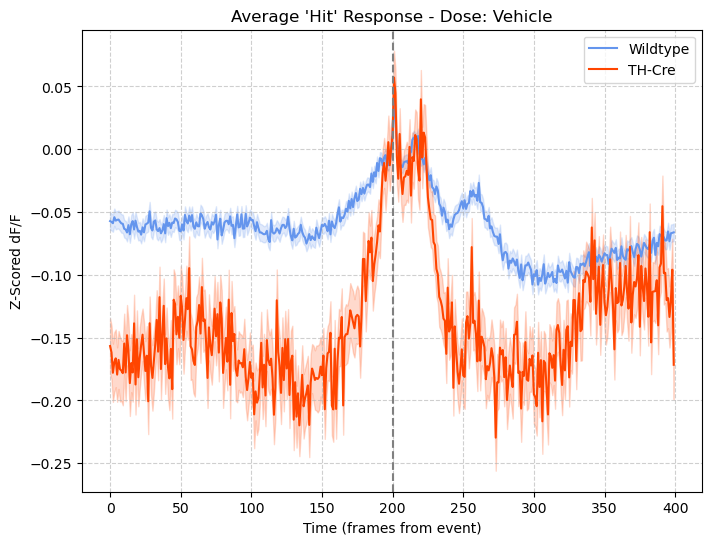

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# --- 1. Aggregate data by both dose and genotype (same as before) ---
data_agg = defaultdict(lambda: defaultdict(list))
event_key = ('mPFC', 'G', 'hit')

for session in sessions:
    info = session.signal_info.get(event_key)
    if not info or not session.drug_infos:
        continue
    
    dose = session.drug_infos[0]['dose']
    genotype = session.genotype
    data_agg[dose][genotype].append(info['signal_matrix'])

# --- 2. Iterate through each dose and create a SEPARATE plot for each ---
# Sort doses to ensure a consistent plot order (Vehicle/None first)
doses = sorted(data_agg.keys(), key=lambda x: (x is None, x))

for dose in doses:
    # Create a new, separate figure for each dose
    plt.figure(figsize=(8, 6)) 
    
    ax = plt.gca() # Get current axes for this figure
    
    # Plot Wildtype data for this dose
    if 'Wildtype' in data_agg[dose]:
        all_wt_hits = np.vstack(data_agg[dose]['Wildtype'])
        avg_wt = np.mean(all_wt_hits, axis=0)
        sem_wt = np.std(all_wt_hits, axis=0) / np.sqrt(all_wt_hits.shape[0])
        ax.plot(avg_wt, label='Wildtype', color='cornflowerblue')
        ax.fill_between(range(len(avg_wt)), avg_wt - sem_wt, avg_wt + sem_wt,
                         color='cornflowerblue', alpha=0.2)

    # Plot TH-Cre data for this dose
    if 'TH-Cre' in data_agg[dose]:
        all_th_cre_hits = np.vstack(data_agg[dose]['TH-Cre'])
        avg_th_cre = np.mean(all_th_cre_hits, axis=0)
        sem_th_cre = np.std(all_th_cre_hits, axis=0) / np.sqrt(all_th_cre_hits.shape[0])
        ax.plot(avg_th_cre, label='TH-Cre', color='orangered')
        ax.fill_between(range(len(avg_th_cre)), avg_th_cre - sem_th_cre, avg_th_cre + sem_th_cre,
                         color='orangered', alpha=0.2)

    # Add plot details for the current figure
    ax.set_title(f"Average 'Hit' Response - Dose: {dose if dose is not None else 'Vehicle'}")
    ax.set_xlabel("Time (frames from event)")
    ax.set_ylabel("Z-Scored dF/F")
    ax.axvline(x=200, color='gray', linestyle='--')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.6)
    
    # Display the completed figure before starting the next one
    plt.show()

**Note**: that this is prior to regenotyping, so the results might not looks as expected. **Nevertheless** you can easily change the sessions to their correct genotypes in the trial guides.